In [1]:
import math
import itertools
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import gridspec
import seaborn as sns
%matplotlib inline

In [2]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf');

font = matplotlib.font_manager.FontProperties(fname='/System/Library/Fonts/Supplemental/Avenir.ttf')

In [3]:
plt.rcParams.update({'text.usetex': True,
                        'font.family': "sans-serif",
                        'text.latex.preamble': r"\usepackage{amsmath}"})

In [4]:
def Lambda(f_0, f_AB):
    f_A = f_0
    f_B = f_0
    f_Ab = f_A - f_AB
    f_aB = f_B - f_AB
    f_ab = 1 - f_Ab - f_aB - f_AB
    if f_AB > f_0:
        Lambda = np.nan
    else: 
        Lambda = f_ab * f_Ab * f_Ab * f_AB / (f_A**2 * (1-f_A)**2 * f_B**2 * (1-f_B)**2)
    return Lambda

In [5]:
n = 1000
f0s = np.logspace(np.log10(2e-5), np.log10(0.5), n)
fABs_norm = np.linspace(0, 2, n)

# creating meshgrids
x = np.empty(shape=(n, n))
y = np.empty(shape=(n, n))
l = np.empty(shape=(n, n))
for i in range(n):
    for j in range(n):
        x[i][j] = f0s[j]
        y[i][j] = fABs_norm[i]
        l[i][j] = Lambda(f0s[j], fABs_norm[i] * f0s[j]**2)

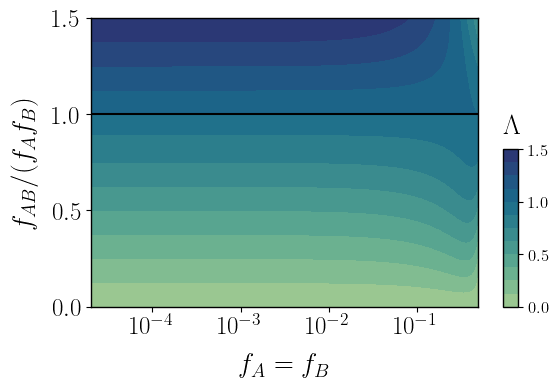

In [6]:
matplotlib.rcParams['axes.linewidth'] = 1
grey = '#b9b9b9'
w = 1.5 # linewidth
fig = plt.figure(figsize=(5, 3.75))


contours = plt.contourf(x, y, l, levels=[0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.895, 1, 1.125, 1.25, 1.375, 1.5], 
                       cmap=sns.color_palette("crest", as_cmap=True), vmin=0, vmax=1.5, extend='neither')

plt.plot(f0s, [1 for x in f0s], '-', color='#000000', linewidth=w)

plt.xscale('log') 
plt.minorticks_off()
plt.xlim(2e-5, 0.5)
plt.ylim(0, 1.5)
plt.tick_params(axis='both', labelsize=18)

plt.xlabel(r"$f_A=f_B$", fontsize=20, labelpad=10);
plt.ylabel(r"$f_{AB}/(f_Af_B)$", fontsize=20, labelpad=10);

plt.text(0.95, 0.9, '$\Lambda$', fontsize=20)

cbar_ax = fig.add_axes([0.95, 0.11, 0.03, 0.42])
cbar = plt.colorbar(contours, alpha=1, cax=cbar_ax, orientation='vertical', shrink=0.5, ticks=[0, 0.5, 1, 1.5])
cbar.ax.set_ylim(0, 1.5)
#cbar.ax.axhline(1, color='#000000')
cbar.ax.tick_params(labelsize=12)


plt.savefig('fig1c.png',dpi=600,bbox_inches='tight') 